In [14]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, savefig
import time
import csv
import sys
import plotly.express as px
import matplotlib.ticker as ticker

In [15]:
df = pd.read_csv("/Users/hamin/ITE3035_Python/Data_Science/endingPrice/BTC_KRW_Data.csv")

In [16]:
df.dtypes

timestamp              object
endingPrice             int64
percentage            float64
profit                  int64
Bithumb_Trans__Vol    float64
profit(0to0)            int64
dtype: object

In [17]:
## converting timestamp column type 'object' to 'datetime'
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d', errors='raise')
df.dtypes

timestamp             datetime64[ns]
endingPrice                    int64
percentage                   float64
profit                         int64
Bithumb_Trans__Vol           float64
profit(0to0)                   int64
dtype: object

In [18]:
# 뒤집기.
df2 = df[::-1]

In [19]:
df2

,timestamp,endingPrice,percentage,profit,Bithumb_Trans__Vol,profit(0to0)
166,2018-02-01,10061000,0.000000,0,1.260000e+11,0
165,2018-02-02,9415000,0.000000,0,2.230000e+11,0
164,2018-02-03,9538000,0.000000,0,1.110000e+11,0
163,2018-02-04,8967000,0.000000,0,1.060000e+11,0
162,2018-02-05,7807000,0.000000,0,1.200000e+11,0
...,...,...,...,...,...,...
4,2018-07-13,7075000,10.046233,108019,1.620175e+10,-518798
3,2018-07-14,7119000,10.573661,-2453009,1.032255e+10,-33260
2,2018-07-15,7192000,14.321249,4226376,9.493440e+09,132662
1,2018-07-16,7475000,6.520084,14644517,3.692650e+10,0


In [20]:
# 한글 폰트, 그래픽 크기 설정
plt.rcParams["font.family"] = 'DejaVu Sans'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (20, 10)

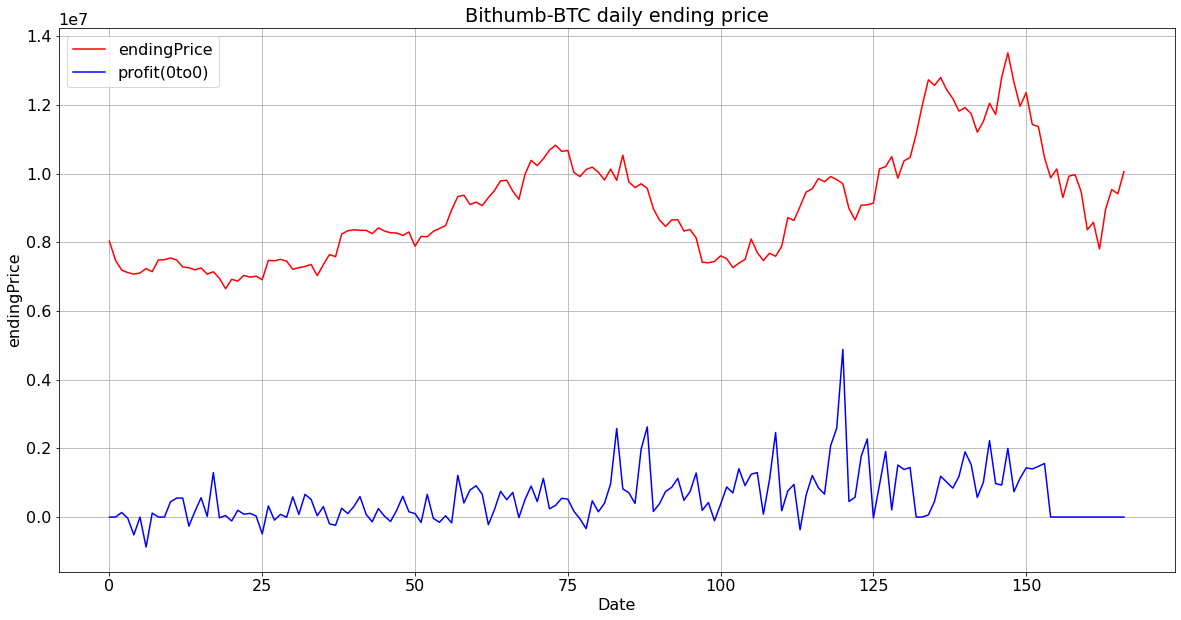

In [21]:
df2['endingPrice'].plot(color = '#ff0000')
df2['profit(0to0)'].plot(color = "#0000ff")
plt.grid()
plt.legend()
plt.title("Bithumb-BTC daily ending price")
plt.xlabel("Date")
plt.ylabel("endingPrice")
plt.show()

In [22]:
df2.head()

,timestamp,endingPrice,percentage,profit,Bithumb_Trans__Vol,profit(0to0)
166,2018-02-01,10061000,0.0,0,1.260000e+11,0
165,2018-02-02,9415000,0.0,0,2.230000e+11,0
164,2018-02-03,9538000,0.0,0,1.110000e+11,0
163,2018-02-04,8967000,0.0,0,1.060000e+11,0
162,2018-02-05,7807000,0.0,0,1.200000e+11,0


In [23]:
df3 = pd.read_csv("/Users/hamin/ITE3035_Python/Data_Science/endingPrice/BTC_KRW_Data.csv", index_col='timestamp', parse_dates=True)

In [24]:
df3.head()

,endingPrice,percentage,profit,Bithumb_Trans__Vol,profit(0to0)
timestamp,,,,,
2018-07-17,8031000,0.007566,2328518,3.348927e+10,0
2018-07-16,7475000,6.520084,14644517,3.692650e+10,0
2018-07-15,7192000,14.321249,4226376,9.493440e+09,132662
2018-07-14,7119000,10.573661,-2453009,1.032255e+10,-33260
2018-07-13,7075000,10.046233,108019,1.620175e+10,-518798


In [25]:
# df3['endingPrice'].plot(color = '#ff0000')
# df4['profit'].plot(color = '#0000ff')
# plt.grid()
# plt.legend()
# plt.title("Bithumb-BTC Ending Price and percentage(2018.02.14 ~ 2018.07.17)")
# plt.xlabel("Date")
# plt.ylabel("Ending Price (10,000,000KRW)")
# plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Bithumb-BTC-EndingPrice.png', dpi=300)
# plt.show()

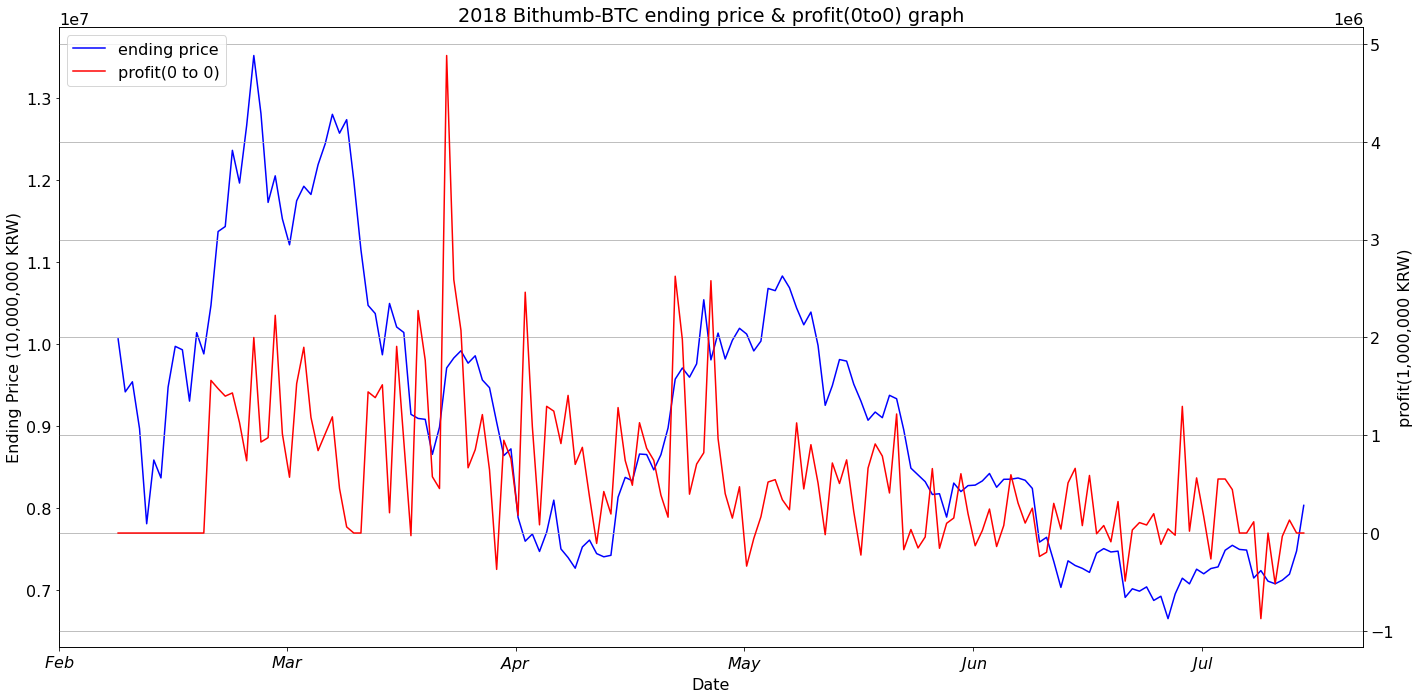

In [26]:
x=df2['timestamp']
y1=df2['endingPrice']
y2=df2['profit(0to0)']
# plt.grid()
# # plt.legend()
# plt.title("Bithumb-BTC daily ending price")
# plt.xlabel("Date")
# plt.ylabel("endingPrice")
# plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
line1 = ax1.plot(np.arange(len(x)), y1, color='b', label='ending price')
line2 = ax2.plot(np.arange(len(x)), y2, color='r', label='profit(0 to 0)')
# ax1.set_xticks(np.arange(0, 100, step=5), ["x_{:0<2d}".format(x) for x in np.arange(0, 100, step=5)])
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 32))
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%10f'))
ax1.set_xticklabels(['$Feb$','$Mar$','$Apr$','$May$','$Jun$','$Jul$'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Ending Price (10,000,000 KRW)')
ax2.set_ylabel('profit(1,000,000 KRW)')
# plot legend for all y axis
lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc=2)

plt.grid(True)
plt.title('2018 Bithumb-BTC ending price & profit(0to0) graph')
fig.tight_layout()

fig.savefig('Bithumb-BTC2018-ending_price-profit(0to0).png', dpi=1000)